In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Intervals import Intervals
from spikeA.Spike_train import Spike_train
from spikeA.Spike_waveform import Spike_waveform
from tqdm import tqdm
import os.path
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import spikeA.spatial_properties
import cv2
from scipy import signal

In [2]:
with open(f"/home/beate/Downloads/ses.pickle", 'rb') as loaded_ses_file:
    ses = pickle.load(loaded_ses_file)
with open(f"/home/beate/Downloads/spatial_auto.pickle", 'rb') as loaded_ses_file:
    auto = pickle.load(loaded_ses_file)

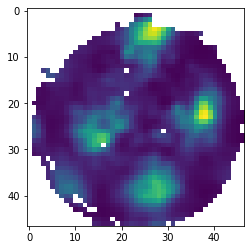

In [3]:
rate_map = ses.cg.neuron_list[1].spatial_properties.firing_rate_map
plt.imshow(rate_map)

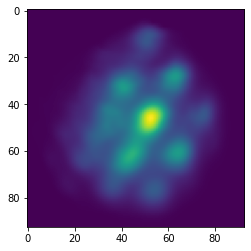

In [4]:
plt.imshow(auto)

To get the spatial autocorrelation manually

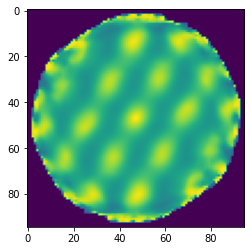

In [5]:
rate_map[np.isnan(rate_map)]=-1
auto_array = np.zeros((2*rate_map.shape[0]+1,2*rate_map.shape[1]+1))
spikeA.spatial_properties.map_autocorrelation_func(rate_map,auto_array)
plt.imshow(auto_array)

To get the spatial autocorrelation via spikeA function

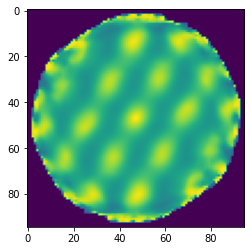

In [6]:
ses.cg.neuron_list[1].set_spatial_properties(ses.ap)
ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map_2d()
plt.imshow(ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map)

Rotate the spatial autocorrelation by 30°

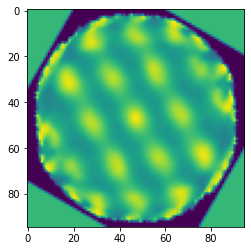

In [29]:
image = ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), 60, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

In [30]:
correlation_matrix = signal.correlate2d (image, rotated)
# normalize
norm_matrix = correlation_matrix/np.max(np.abs(correlation_matrix))
correlation = np.mean(norm_matrix)

In [31]:
correlation

0.07452584498454552